# Linear Regression

Linear regression is one of the simplest and most widely used models for supervised learning. In this chapter, we will explore the linear regression model and show how it can be used.

## Simple Linear Regression

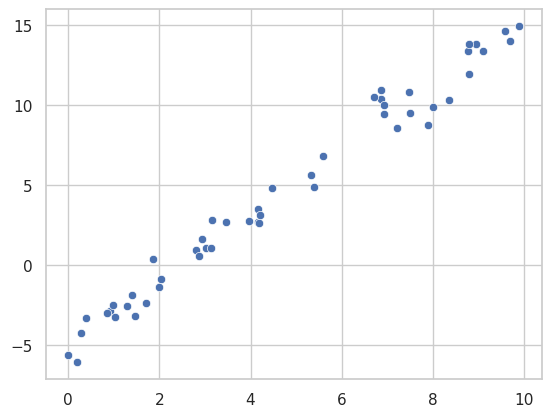

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seaborn settings
sns.set(style="whitegrid")

# Generating random data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

# Scatter plot with seaborn
sns.scatterplot(x=x, y=y)
plt.show()

The linear regression model assumes that the relationship between two variables is approximately linear.

# Fitting the Model

To fit a linear model, we can use the LinearRegression estimator from scikit-learn.

Optimized slope: 2.0272087892409787, Optimized intercept: -4.998576993454616


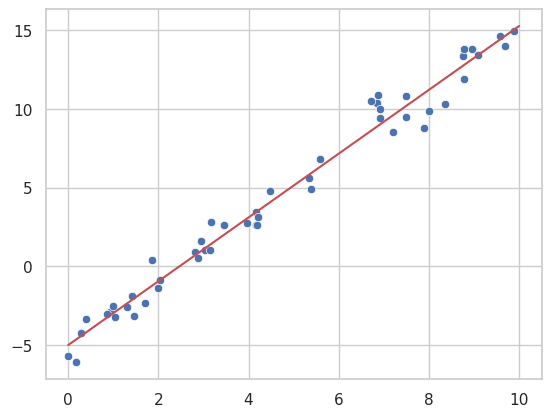

In [2]:
from scipy.optimize import minimize

# Define loss function: sum of squared residuals
def loss(params, x, y):
    slope, intercept = params
    return np.sum((y - (slope * x + intercept))**2)

# Minimize the loss function
initial_guess = [0, 0]
result = minimize(loss, initial_guess, args=(x, y))

# Optimized parameters
slope, intercept = result.x

# Print the optimized slope and intercept
print(f"Optimized slope: {slope}, Optimized intercept: {intercept}")

# Generate prediction line
xfit = np.linspace(0, 10, 1000)
yfit = slope * xfit + intercept

# Plot data and model
sns.scatterplot(x=x, y=y)
plt.plot(xfit, yfit, color='r')
plt.show()

This model fits a line to the data and makes predictions based on this line.

Polynomial Regression
Linear regression can be extended to handle more complex relationships by transforming the input data. Here, we demonstrate polynomial regression.

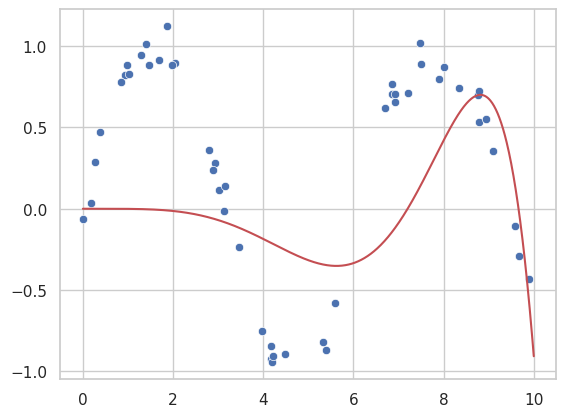

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
import numpy as np

# Generate random data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y_non_linear = np.sin(x) + 0.1 * rng.randn(50)

# Polynomial basis function for x
poly = PolynomialFeatures(degree=7)
x_poly = poly.fit_transform(x[:, np.newaxis])

# Define loss function for polynomial regression
def poly_loss(params, x_poly, y):
    return np.sum((y - np.dot(x_poly, params))**2)

# Initial guess for polynomial coefficients
initial_guess_poly = np.zeros(x_poly.shape[1])

# Minimize loss
result_poly = minimize(poly_loss, initial_guess_poly, args=(x_poly, y_non_linear))

# Predicted polynomial coefficients
poly_coeffs = result_poly.x

# Generate polynomial fit
xfit = np.linspace(0, 10, 1000)
xfit_poly = poly.transform(xfit[:, np.newaxis])
yfit_poly = np.dot(xfit_poly, poly_coeffs)

# Plot the polynomial fit
sns.scatterplot(x=x, y=y_non_linear)
plt.plot(xfit, yfit_poly, color='r')
plt.show()